<a href="https://colab.research.google.com/github/Dhut/Myfifth/blob/master/Notebook/EP2_S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import cv2
from keras.layers import Activation


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [0]:
print(train_features.shape,train_labels.shape, test_features.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [0]:
print(np.mean(train_features[:,:,:,0]),np.mean(train_features[:,:,:,1]),np.mean(train_features[:,:,:,2]))
print(np.std(train_features[:,:,:,0]),np.std(train_features[:,:,:,1]),np.std(train_features[:,:,:,2]))

125.306918046875 122.950394140625 113.86538318359375
62.993219278136884 62.08870764001421 66.70489964063091


In [0]:
mean = [125.307, 122.95, 113.865]
std = [62.9932, 62.0887, 66.7048]

In [0]:
train_features.max(),train_features.min(), test_features.max(),test_features.min()

(255, 0, 255, 0)

## Image Normalization

In [0]:
train_features = train_features.astype('float32')
test_features = test_features.astype('float32')

for i in range(3):
      train_features[:,:,:,i] = (train_features[:,:,:,i] - mean[i]) / std[i]
      test_features[:,:,:,i] = (test_features[:,:,:,i] - mean[i]) / std[i]

In [0]:
train_features.max(),train_features.min(), test_features.max(),test_features.min()

(2.126796, -1.9892148, 2.126796, -1.9892148)

In [0]:
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

W0627 08:37:18.994510 139933338011520 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0627 08:37:19.034986 139933338011520 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0627 08:37:19.074447 139933338011520 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0627 08:37:19.114836 139933338011520 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0627 08:37:19.159281 139933338011520 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0627 08:37:19.201548 139933338011520 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0627 08:37:19.241473 139933

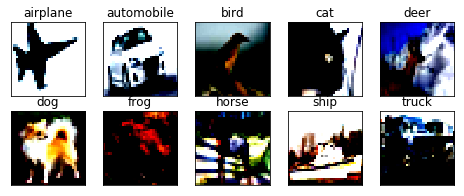

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

#  Pretrained ResNet18 Architecture

In [0]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-6_tk8kxh
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-6_tk8kxh
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-h008f5ze/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
from classification_models.resnet import ResNet18

In [0]:
base_model = ResNet18((224, 224, 3), weights='imagenet')

W0627 08:58:14.783874 139933338011520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 08:58:14.818609 139933338011520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 08:58:14.819944 139933338011520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0627 08:58:14.821031 139933338011520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0627 08:58:14.823407 139933

46981120/46977688 [==============================] - 5s 0us/step


In [0]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 224, 224, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

## Pretrained Model Classifier Modification

In [117]:
base_model = ResNet18((32, 32, 3), weights='imagenet', include_top=False)
layer_19 = Convolution2D(10, 1, 1)(base_model.output)
globavgpool = GlobalAveragePooling2D()(layer_19)
out = Activation('softmax')(globavgpool)

model = Model(inputs=[base_model.input], outputs=[out])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  


In [118]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_415 (ZeroPadding (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_415[0][0]         
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
# import adam optimizer parameters
from keras.optimizers import Adam
# set adam optimizer parameters
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 78s 200ms/step - loss: 0.9033 - acc: 0.6875 - val_loss: 0.9082 - val_acc: 0.6969

Epoch 00001: val_acc improved from -inf to 0.69690, saving model to Eip3_assgn_5_weights_0_100.h5
Epoch 2/100
390/390 [==============================] - 54s 137ms/step - loss: 0.6412 - acc: 0.7795 - val_loss: 1.0786 - val_acc: 0.6801

Epoch 00002: val_acc did not improve from 0.69690
Epoch 3/100
390/390 [==============================] - 53s 137ms/step - loss: 0.5680 - acc: 0.8045 - val_loss: 0.8040 - val_acc: 0.7431

Epoch 00003: val_acc improved from 0.69690 to 0.74310, saving model to Eip3_assgn_5_weights_0_100.h5
Epoch 4/100
390/390 [==============================] - 54s 137ms/step - loss: 0.5148 - acc: 0.8230 - val_loss: 0.6108 - val_acc: 0.8006

Epoch 00004: val_acc improved from 0.74310 to 0.80060, saving model to Eip3_assgn_5_weights_0_100.h5
Epoch 5/100
390/390 [==============================] - 53s 137ms/step - loss: 0.4770 - acc: 0.8340 - v

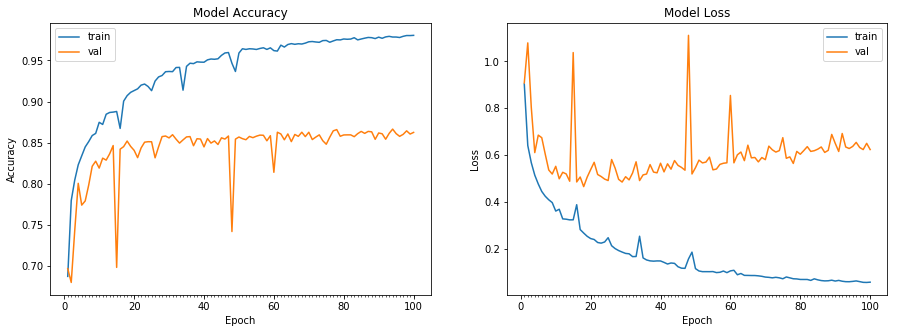

Accuracy on test data is: 86.25


In [120]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

final_weights_path = 'Eip3_assgn_5_weights_0_100.h5'

callbacks_list = [
    ModelCheckpoint(final_weights_path, monitor='val_acc', verbose = 1,save_best_only = True)
   
]

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=True,
                             # randomly shift images horizontally
                             width_shift_range=0.1,
                             # randomly shift images vertically
                             height_shift_range=0.1,
                             # set function that will be applied on each input
                             preprocessing_function=None,)

# Compile the model
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), callbacks = callbacks_list, verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Save Best weights on Google Drive

In [121]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [124]:
model.save_weights('Eip3_assgn_5_weights_0_100.h5')
weights_file = drive.CreateFile({'title' : 'Eip3_assgn_5_weights_0_100.h5'})
weights_file.SetContentFile('Eip3_assgn_5_weights_0_100.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1opConMp0oGOvspC7ma8gjBV72m9bJF2B'})

In [0]:
!ls /content/gdrive/'My Drive'/

## 50 different misclassified images selection for Grad Cam check

In [0]:
class_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',
               5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [0]:
Y_prediction = model.predict(test_features)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels,axis = 1) 

In [0]:
incorrect_indices = np.where(Y_pred_classes != Y_true)[0]

In [129]:
len(incorrect_indices)

1375

In [130]:
incorrect_indices[:10]

array([ 1,  9, 20, 35, 52, 58, 59, 61, 85, 95])

In [0]:
import random
random.shuffle(incorrect_indices)

In [132]:
incorrect_indices[:10]

array([7451, 3301,  452, 6353, 8597, 5940, 1228, 8580, 5211, 3356])

In [0]:
misclassified_images = incorrect_indices[:50]

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()## train features get scaled in grad check function

## Visualize 50 misclassified images

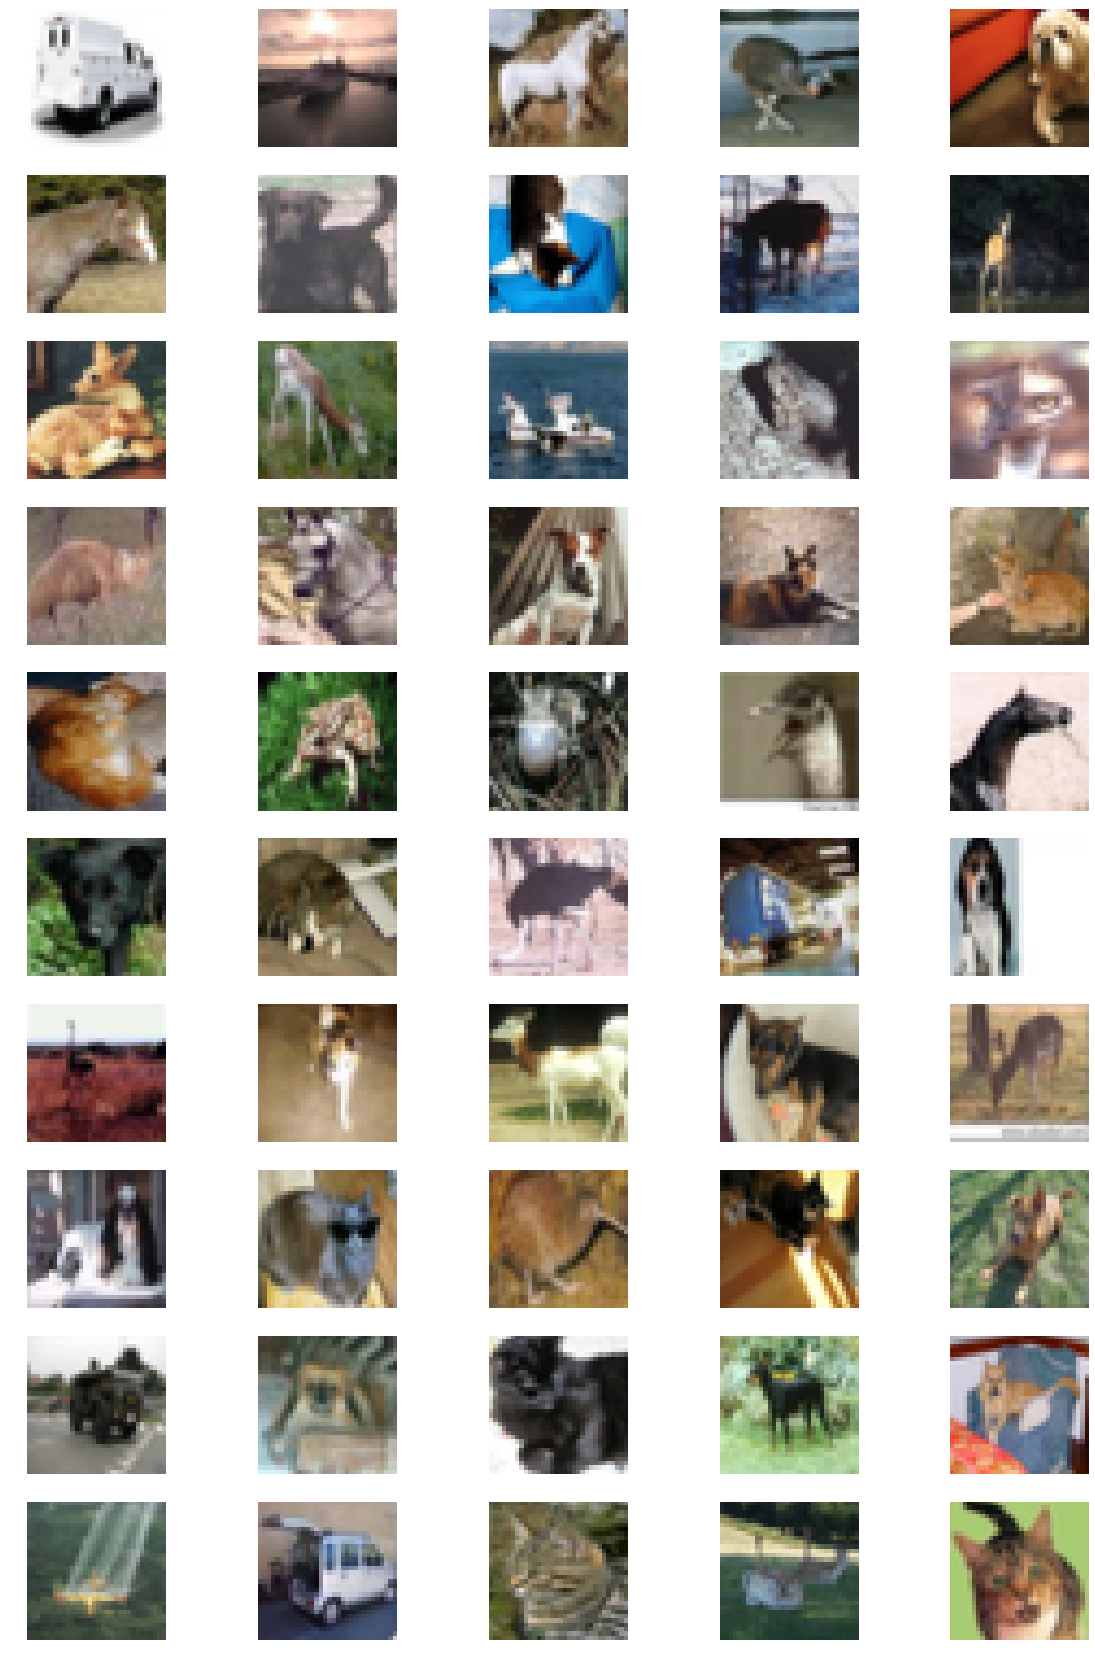

In [141]:
fig = plt.figure(figsize=(20, 30))

test_features1 = np.copy(test_features)
all_images = []
for ind_ in misclassified_images:
  all_images.append(test_features1[ind_])
  
cols, rows = 5, 10
img_num = cols * rows

for i in range(img_num):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(all_images[i], interpolation="nearest")
    plt.axis('off')

## Layer selection to calculate grad check

In [143]:
model.get_layer('add_188')

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()## train features get scaled in grad check function

## Grad Cam implementation and visualization for misclassified images

In [0]:
def grad_cam(test_data, img_id, last_layer, num_channels):
    img = test_data[img_id]
    x = np.copy(img)
    x = np.expand_dims(x, axis=0)
    x = x.astype('float32')
    

    for i in range(3):
        x[:,:,:,i] = (x[:,:,:,i] - mean[i]) / std[i]
    
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer(last_layer)
    
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(num_channels):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    return {'original' : img, 'grad_cam': superimposed_img, 'class_idx': class_idx}

In [0]:
def show_images(result):
  fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,10))

  ax1.imshow(result['original'])
  ax1.set_title(class_dict[result['class_idx']])

  ax2.imshow(result['grad_cam'])
  ax2.set_title('Gradient weighted Class Activation Map')

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()## train features get normalized in grad check function

In [0]:
test_features1 = np.copy(test_features)

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


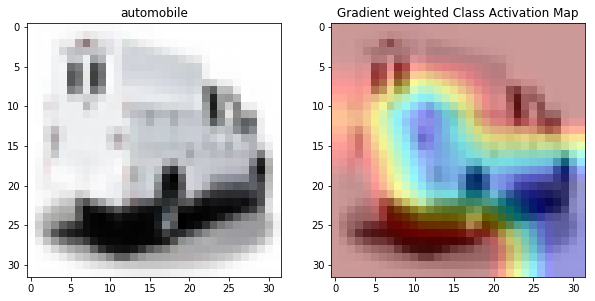

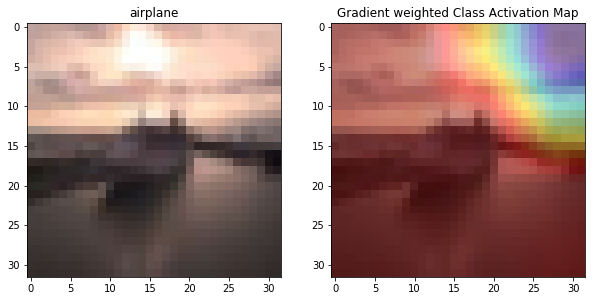

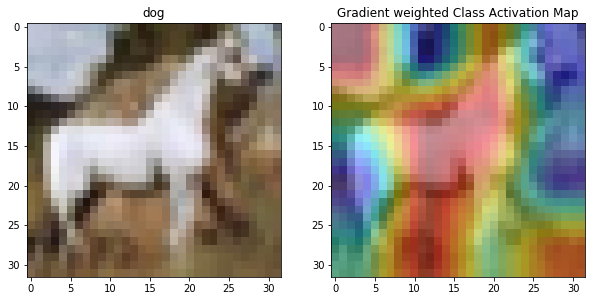

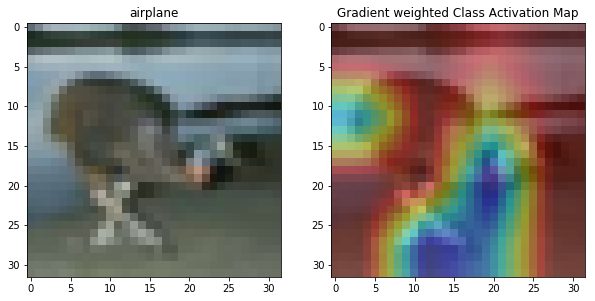

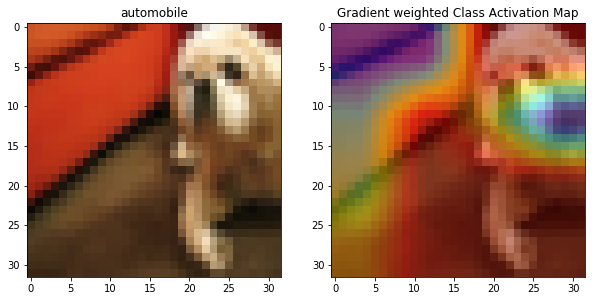

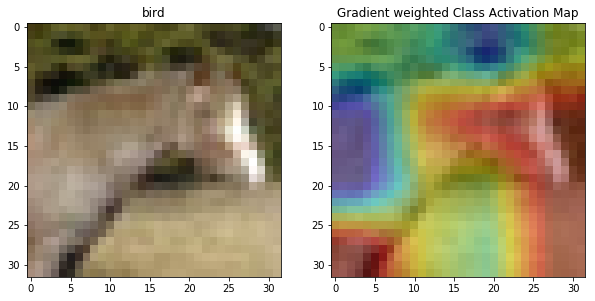

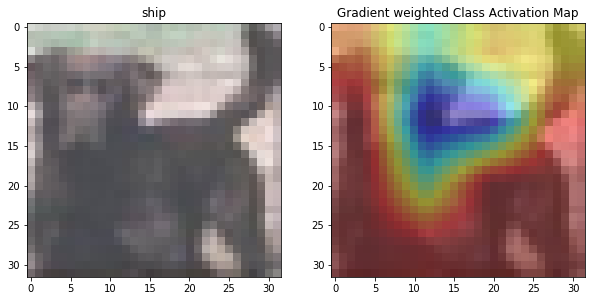

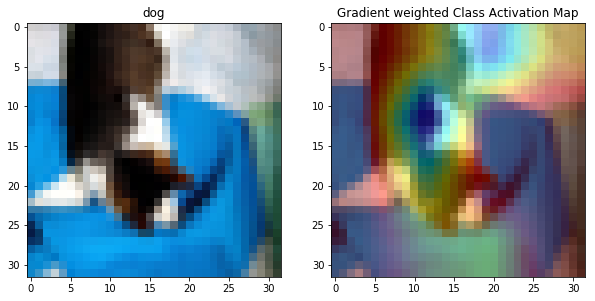

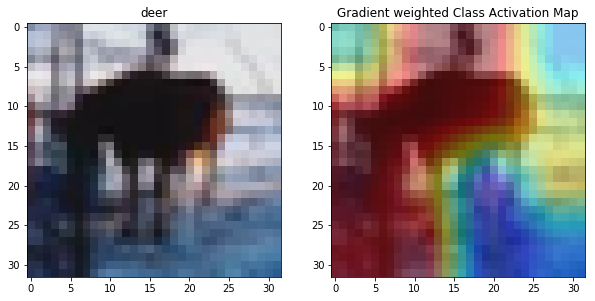

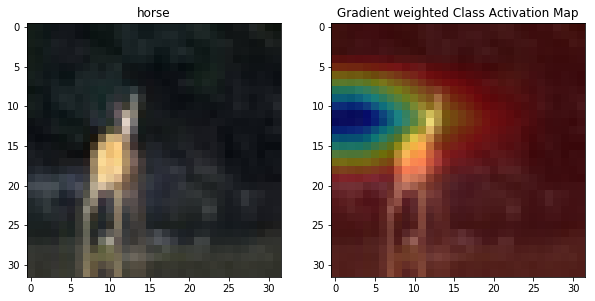

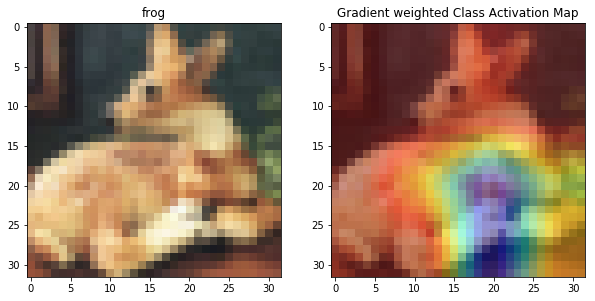

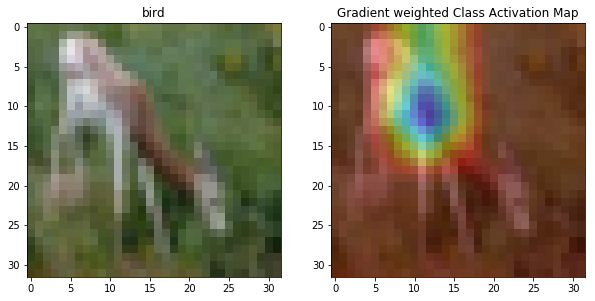

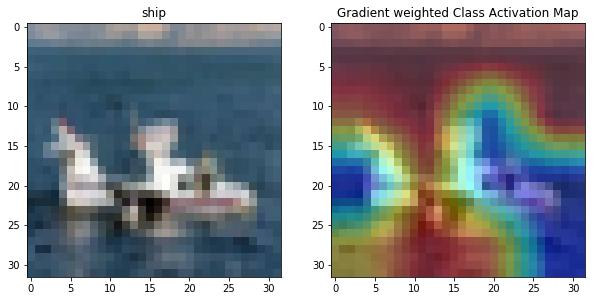

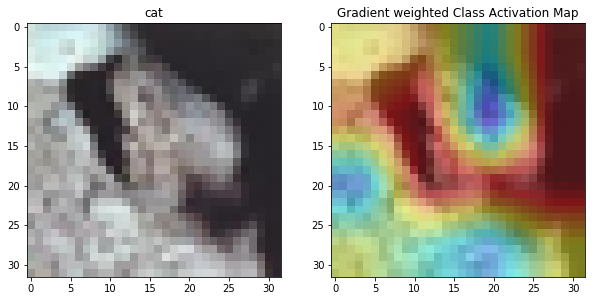

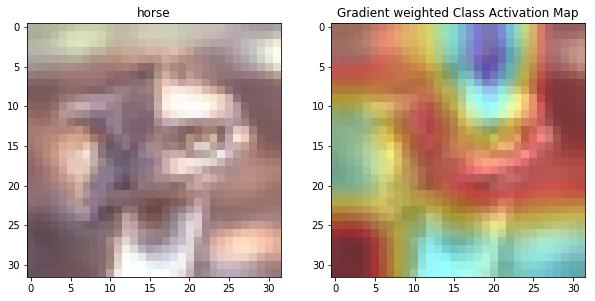

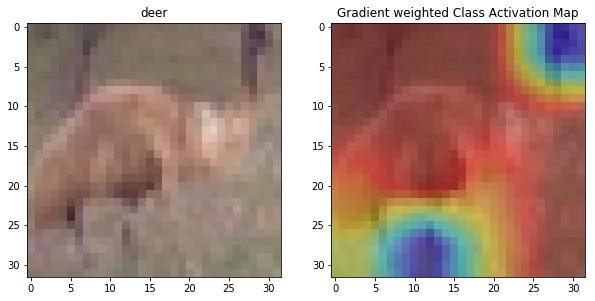

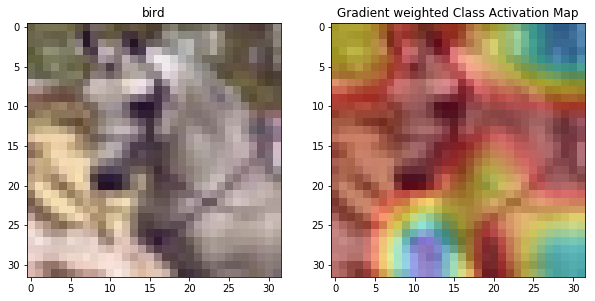

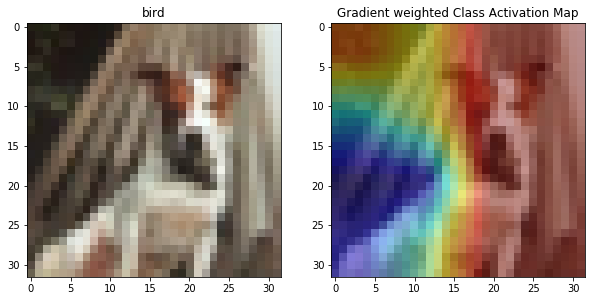

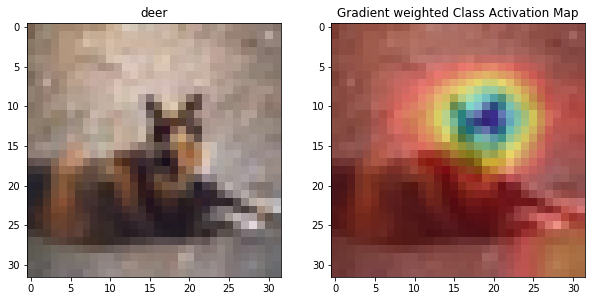

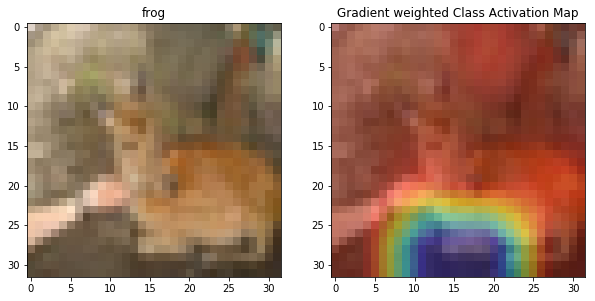

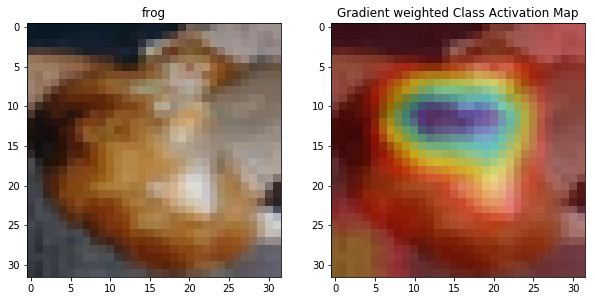

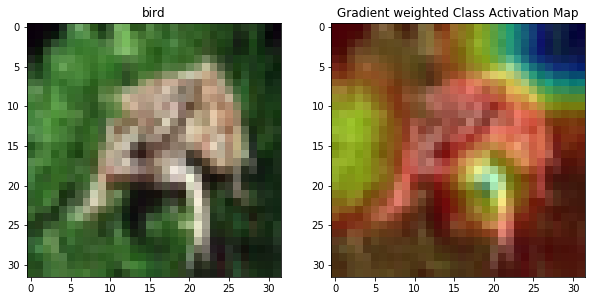

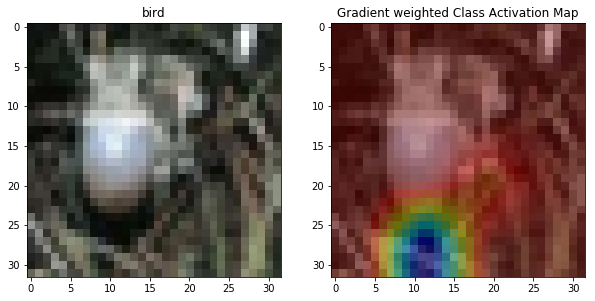

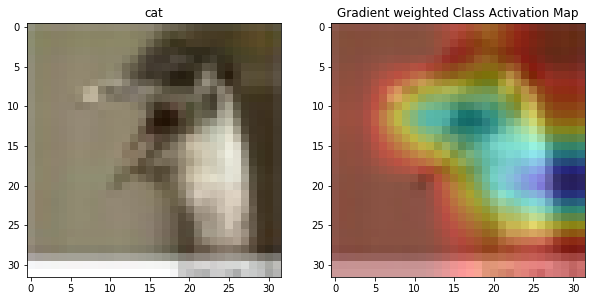

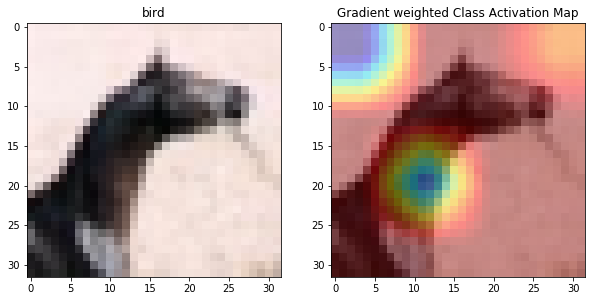

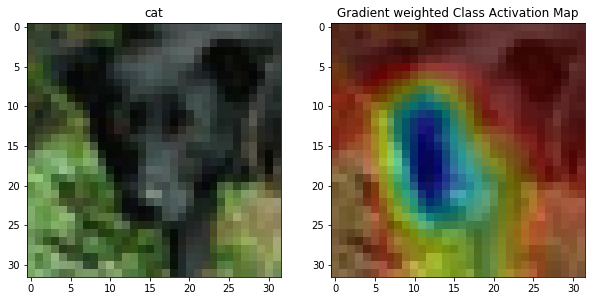

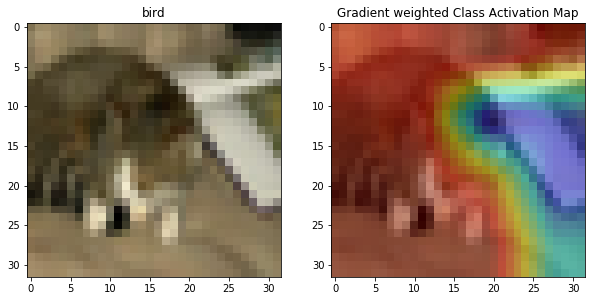

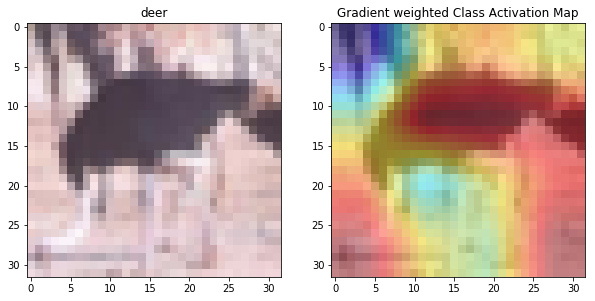

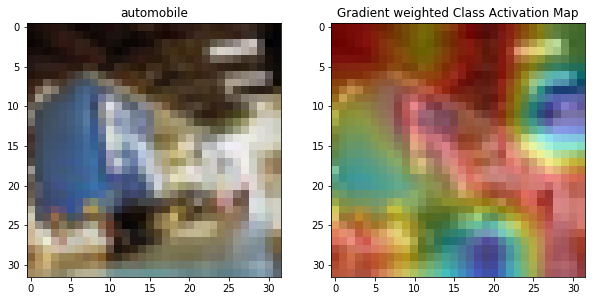

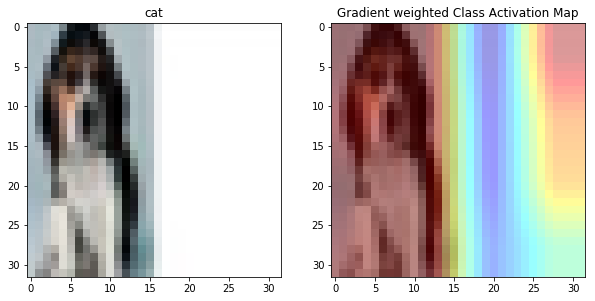

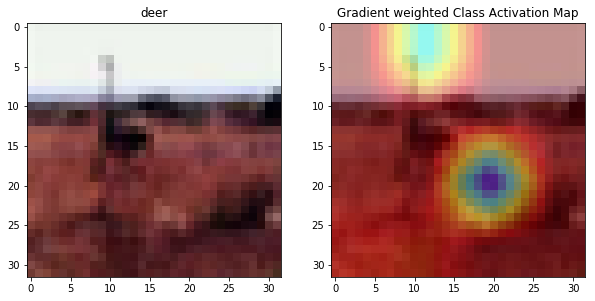

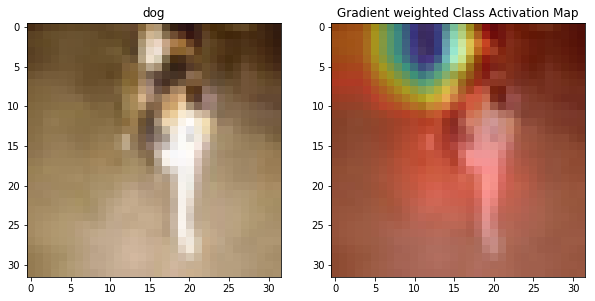

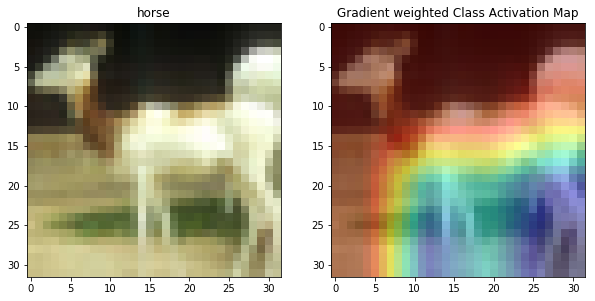

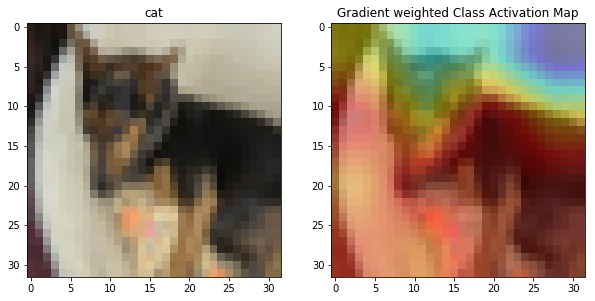

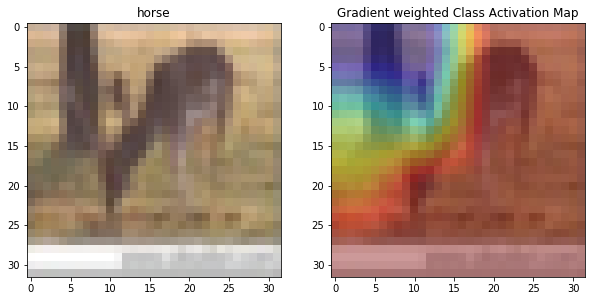

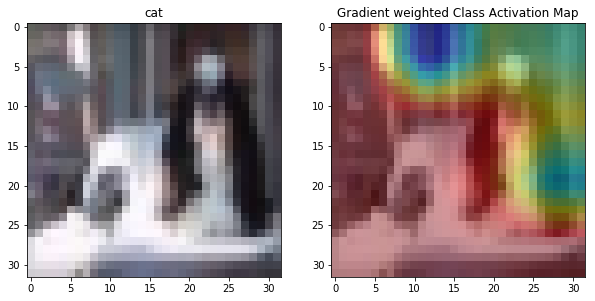

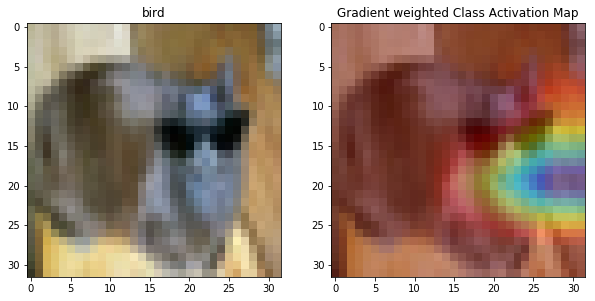

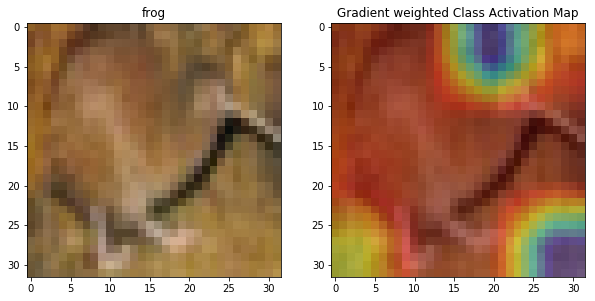

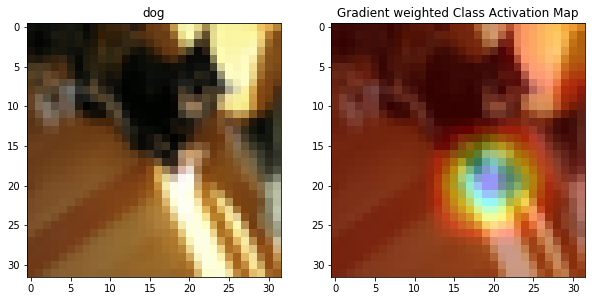

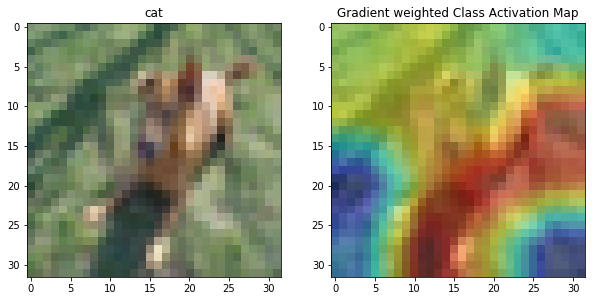

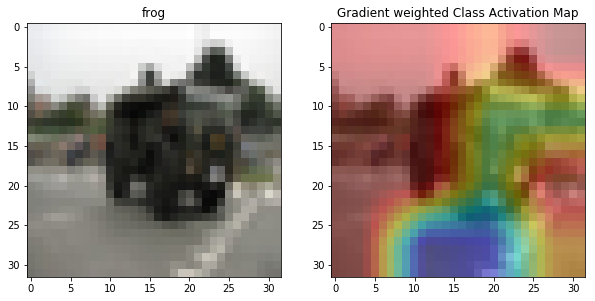

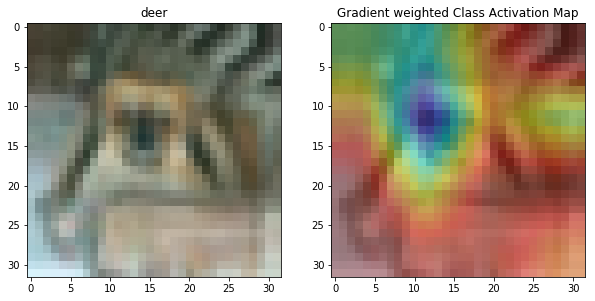

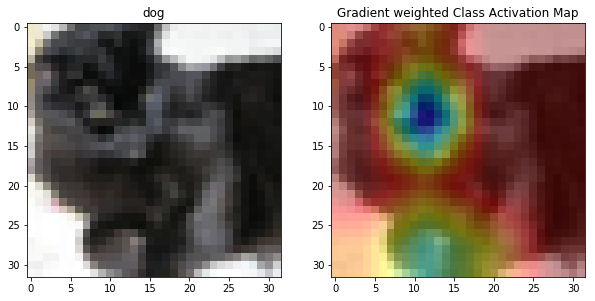

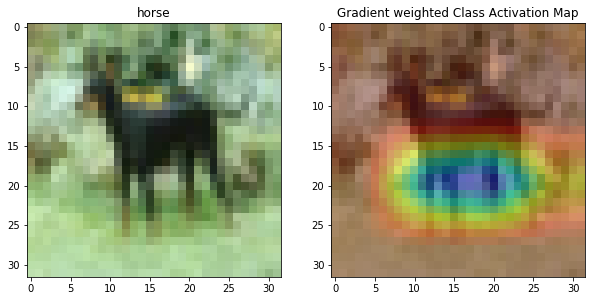

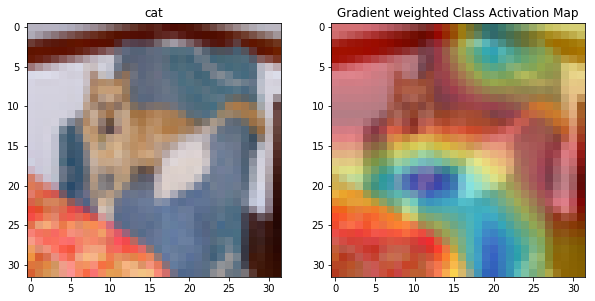

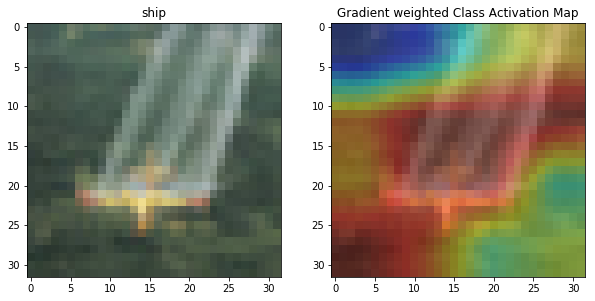

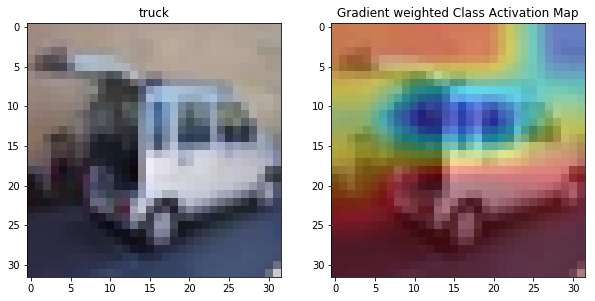

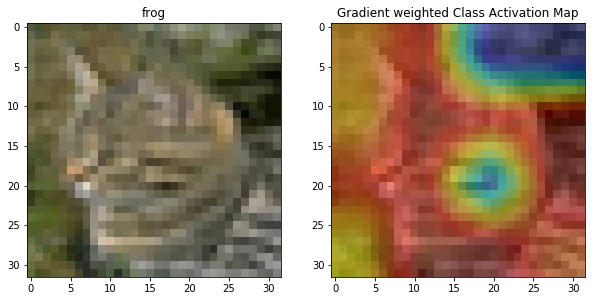

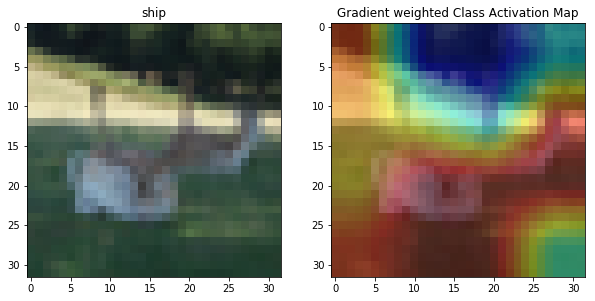

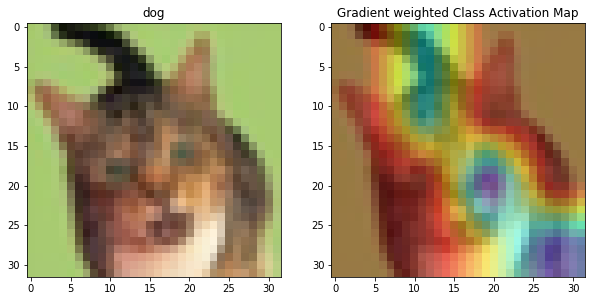

In [151]:
for img_id in misclassified_images:
  result = grad_cam(test_features1, img_id, 'add_188', 128)
  show_images(result)